# Dimensionality Reduction
##### Sean Wade

In [110]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, load_digits, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
% matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter_3.css').read())

## Cancer Data

Because of the different types of the mesurments and featuers it dosn't make sense to do PCA. Instead I use random forrests to find the most important dimesnions and use those.

In [173]:
breast_cancer = load_breast_cancer()
data, labels = breast_cancer['data'], breast_cancer['target']

In [179]:
def get_best(data, labels, n_components=2):
    rf = RandomForestClassifier()
    rf.fit(data, labels)
    ranked_featuers = np.argsort(rf.feature_importances_)[-n_components:][::-1]
    return ranked_featuers

In [180]:
best_features = get_best(data, labels, n_components=30/4)
reduced_data = data[:,best_features]

In [181]:
print("Original Data: {}".format(data.shape[1]))
print("Reduced Data: {}".format(reduced_data.shape[1]))

Original Data: 30
Reduced Data: 7


### Learn

In [182]:
# Without Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=.7)

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.94736842105263153

In [183]:
# With Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(reduced_data, labels, train_size=.7)

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.92397660818713445

### Visualize

In [69]:
cancer_pca = PCA(n_components=2)
cancer_pca.fit(data)
reduced_data = cancer_pca.transform(data)

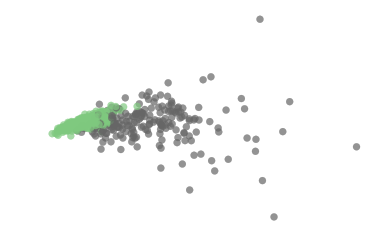

In [70]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap=plt.cm.Accent_r, alpha=.7)
plt.axis('off')
plt.show()

## Digits

Since the digets is just pixels, and they have the same relations I chose to compress by using PCA.

In [89]:
digits = load_digits()
data, labels = digits['data'], digits['target']

In [90]:
cancer_pca = PCA(n_components=64/4)
cancer_pca.fit(data)
reduced_data = cancer_pca.transform(data)

In [91]:
print("Original Data: {}".format(data.shape[1]))
print("Reduced Data: {}".format(reduced_data.shape[1]))

Original Data: 64
Reduced Data: 16


### Learn

In [99]:
# Without Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=.7)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.94999999999999996

In [100]:
# With Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(reduced_data, labels, train_size=.7)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.93518518518518523

### Visualize

In [74]:
cancer_pca = PCA(n_components=2)
cancer_pca.fit(data)
reduced_data = cancer_pca.transform(data)

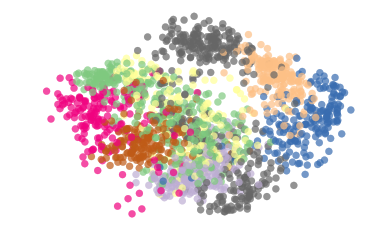

In [75]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap=plt.cm.Accent_r, alpha=.7)
plt.axis('off')
plt.show()

## Faces

Same as the digits, the faces images are suited well for PCA and finding the pricipal axis.

In [132]:
faces = fetch_olivetti_faces()
images, data, labels = faces['images'], faces['data'], faces['target']

In [133]:
cancer_pca = PCA(n_components=4096/4)
cancer_pca.fit(data)
reduced_data = cancer_pca.transform(data)

In [134]:
print("Original Data: {}".format(data.shape[1]))
print("Reduced Data: {}".format(reduced_data.shape[1]))

Original Data: 4096
Reduced Data: 400


### Learn

In [136]:
# Without Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=.7)

model = MLPClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.76666666666666672

In [109]:
# With Dimension Reduction
x_train, x_test, y_train, y_test = train_test_split(reduced_data, labels, train_size=.7)

model = MLPClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.84166666666666667